      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PIRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


D:\pycharm\annconda\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
D:\pycharm\annconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


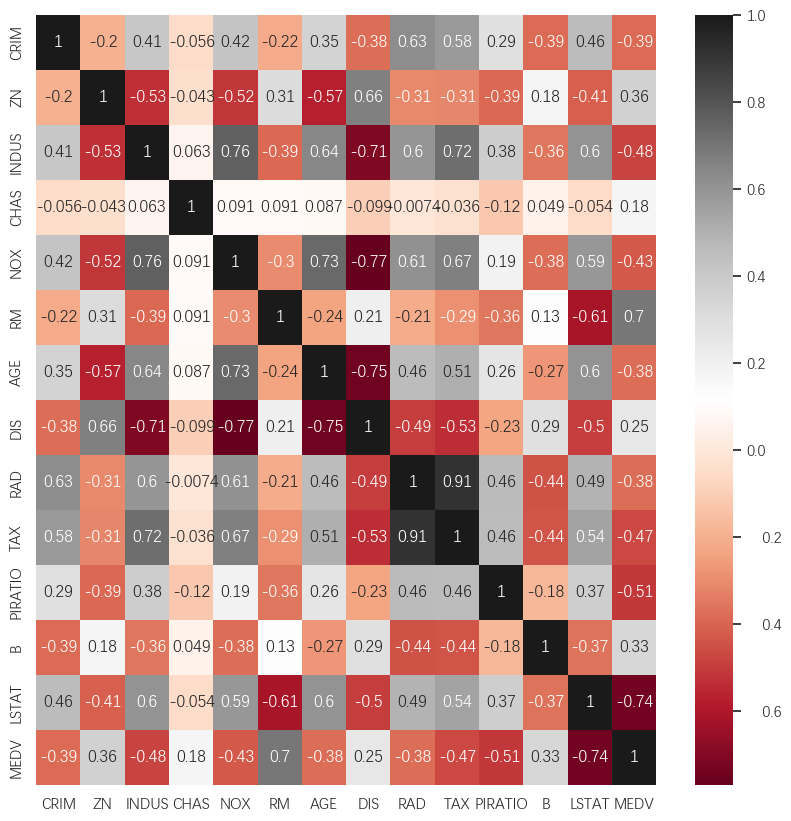

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set()    #设置画图空间为 Seaborn 默认风格
# 汉化字体
matplotlib.rc("font", family='DengXian')

def load_csv():
    data = pd.read_csv("boston.csv")
    print(data.head(5))
    return data

# 归一化数据
def z_score_normalize_data(data, target_cols):
    for col in target_cols:
        col_min = data[col].min()
        col_max = data[col].max()
        data[col] = (data[col] - col_min) / (col_max - col_min)
    return data


# 对特定列使用标准差法处理离群值
"""
def remove_outliers_std(data, col, threshold=3):
    mean = data[col].mean()
    std = data[col].std()
    lower_bound = mean - threshold * std
    upper_bound = mean + threshold * std
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data
"""
def remove_outliers_std(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data


class Network(object):
    def __init__(self, num_of_weights, lambda_reg=1):
        np.random.seed(0)
        self.w = -2 * np.random.randn(num_of_weights, 1)
        self.b = 0.
        self.lambda_reg = lambda_reg  # 正则化参数

    def forward(self, x):
        z = np.dot(x, self.w) + self.b
        return z

    def loss(self, z, y):
        cost = np.mean((z - y) ** 2)
        return cost

    def loss_with_reg(self, z, y):
        cost = np.mean((z - y) ** 2)
        # 计算 L1 正则化项
        reg = self.lambda_reg * np.sum(np.abs(self.w))
        return cost + reg

    def gradient(self, x, y):
        z = self.forward(x)
        error = z - y
        gradient_w = (np.dot(x.T, error) + self.lambda_reg * self.w) / x.shape[0]  #
        gradient_b = np.mean(error)
        return gradient_w, gradient_b

    def update(self, gradient_w, gradient_b, eta=0.01):
        self.w -= eta * gradient_w
        self.b -= eta * gradient_b

    def train_with_normal_equation(self, x, y):
        # 添加偏置项列
        X_b = np.c_[np.ones((x.shape[0], 1)), x]
        # 使用最小二乘法计算参数估计值
        theta = np.dot(np.dot(np.linalg.inv(np.dot(X_b.T, X_b)), X_b.T), y)
        self.b = theta[0]
        self.w = theta[1:]

    def print_model_info(self):
        print("Weights (w):")
        print(self.w)
        print("Bias (b):")
        print(self.b)

    def r_squared(self, x, y):
        z = self.forward(x)
        SS_res = np.sum((z - y) ** 2)  # 残差平方和
        SS_tot = np.sum((y - np.mean(y)) ** 2)  # 总平方和
        r2 = 1 - SS_res / SS_tot
        return r2

    def train(self, x, y, iterations=100, eta=0.01, lambda_reg=1):
        losses = []
        for i in range(iterations):
            z = self.forward(x)
            L = self.loss(z, y)
            gradient_w, gradient_b = self.gradient(x, y)
            self.update(gradient_w, gradient_b, eta)
            losses.append(L)
            if (i + 1) % 1000 == 0:
                print('iter {}, loss {}'.format(i, L))
                r2_test = self.r_squared(x, y)
                print('R方: {}'.format(r2_test))
        return losses, self.w, self.b


data = load_csv()
corrboston = data.corr()
plt.figure(figsize=(10,10))    #设置画布
sns.heatmap(corrboston,annot=True,cmap='RdGy')
plt.show()

      CRIM   ZN     INDUS  CHAS    NOX        RM       AGE       DIS  \
0  0.00632  0.4  0.032739     0  0.538  0.565717  0.641607  0.384000   
1  0.02731  0.0  0.230004     0  0.469  0.494945  0.782698  0.520249   
2  0.02729  0.0  0.230004     0  0.469  0.846048  0.599382  0.520249   
3  0.03237  0.0  0.027352     0  0.458  0.760110  0.441813  0.690361   
4  0.06905  0.0  0.027352     0  0.458  0.828585  0.528321  0.690361   

        RAD       TAX   PIRATIO         B     LSTAT  MEDV  
0  0.000000  0.433735  0.280488  1.000000  0.152154  24.0  
1  0.142857  0.216867  0.585366  1.000000  0.346910  21.6  
2  0.142857  0.216867  0.585366  0.878399  0.107678  34.7  
3  0.285714  0.136546  0.695122  0.932178  0.056648  33.4  
4  0.285714  0.136546  0.695122  1.000000  0.168539  36.2  
iter 999, loss 19.353973268658933
R方: 0.3949512731966799
iter 1999, loss 13.289108679788212
R方: 0.5844259896309486
iter 2999, loss 11.241497824567945
R方: 0.6484126896112246
iter 3999, loss 10.348554395091998

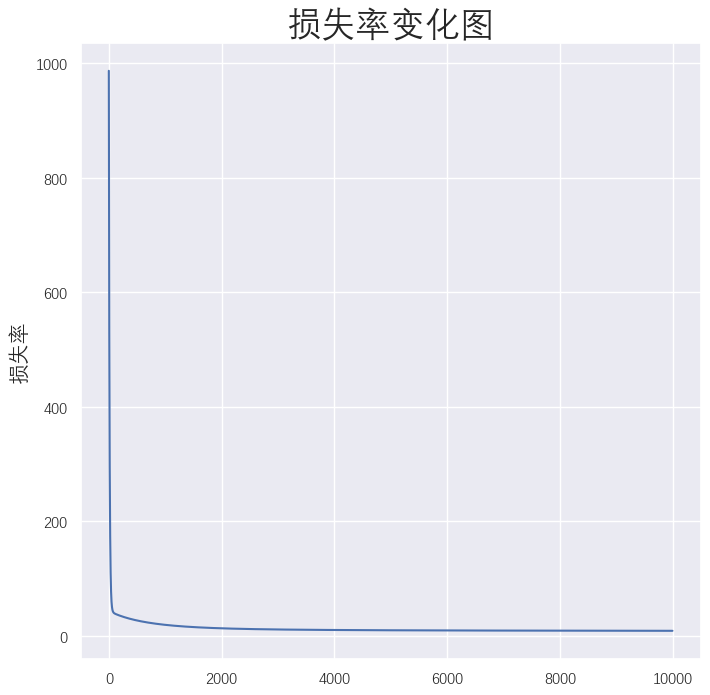

测试集损失: 8.143322738963436
测试集R方: 0.7913544349251203
最小二乘法训练集损失: 8.037779229383512
最小二乘法训练集R方: 0.7485834704301503
最小二乘法测试集R方: 0.8122561030945047


In [2]:
columns_to_process = ['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PIRATIO', 'B', 'LSTAT']
for col in columns_to_process:
    data = remove_outliers_std(data, col)
target_cols = ['ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PIRATIO', 'B', 'LSTAT']
data = z_score_normalize_data(data, target_cols)
print(data.head(5))
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values.reshape(-1, 1)
offset = int(x.shape[0] * 0.7)
x_train, x_test = x[:offset], x[offset:]
y_train, y_test = y[:offset], y[offset:]
net = Network(x_train.shape[1], lambda_reg=0.1)
num_iterations = 10000
losses, fw, fb= net.train(x_train, y_train, iterations=num_iterations, eta=0.01)



plt.figure(figsize=(8, 8), num="损失函数")
plot_x = np.arange(num_iterations)
plot_y = np.array(losses)
plt.plot(plot_x, plot_y)
plt.ylabel("损失率", fontsize=15)
plt.title("损失率变化图", fontsize=25)
plt.show()


# 在测试集上验证模型性能
predictions_test = np.dot(x_test, fw) + fb
test_loss = np.mean((predictions_test - y_test) ** 2)
r2_test = net.r_squared(x_test, y_test)
print('测试集损失:', test_loss)
print('测试集R方:', r2_test)

# 使用最小二乘法训练模型
net.train_with_normal_equation(x_train, y_train)
train_loss = net.loss(net.forward(x_train), y_train)
train_r2 = net.r_squared(x_train, y_train)
test_r2_ne = net.r_squared(x_test, y_test)

print('最小二乘法训练集损失:', train_loss)
print('最小二乘法训练集R方:', train_r2)
print('最小二乘法测试集R方:', test_r2_ne)